# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [49]:
X,y,c = make_blobs(500, cluster_std= 0.8, centers=6, n_features=2, return_centers=True)

In [50]:
X

array([[-4.09639113e+00,  4.93477136e+00],
       [-4.66916936e+00,  3.10294504e+00],
       [-6.26895507e+00, -5.66607797e+00],
       [-4.04521893e+00,  2.78553023e+00],
       [-5.60688206e+00,  3.60959616e+00],
       [ 1.50047469e+00, -9.08648508e+00],
       [-3.47400309e+00,  1.54325480e+00],
       [ 1.60694972e+00, -8.55048521e+00],
       [ 8.94961189e-01, -1.44024588e+00],
       [-7.33935726e+00,  2.62665383e+00],
       [-4.39086396e+00, -6.92035454e+00],
       [ 9.41893196e-01, -1.15477741e+01],
       [-5.41704667e+00,  3.17776428e+00],
       [-1.50889889e+00, -2.51320049e-01],
       [-5.87666614e+00, -7.35052595e+00],
       [-7.51795715e+00,  2.48362766e+00],
       [-8.58704407e+00,  1.88230181e+00],
       [-8.72920212e+00,  2.38379733e+00],
       [-6.06215594e+00, -6.01874381e+00],
       [-7.97910642e+00,  2.42698849e+00],
       [-5.07907362e-02, -9.67595665e+00],
       [-5.35555806e+00, -5.74034321e+00],
       [-5.53046108e+00, -7.14248856e+00],
       [-5.

In [51]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)


In [52]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)

## Visualización de datos

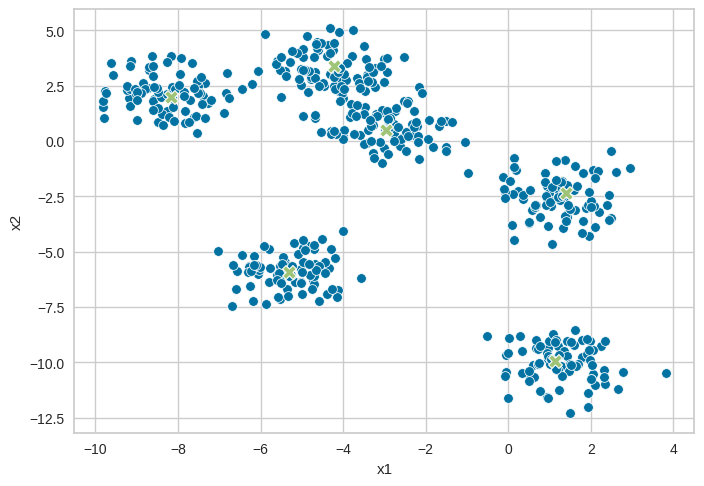

In [53]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 )
plt.show()

## Aplicando K-means

In [54]:
kmeans = KMeans(n_clusters=5)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
     
    }
)

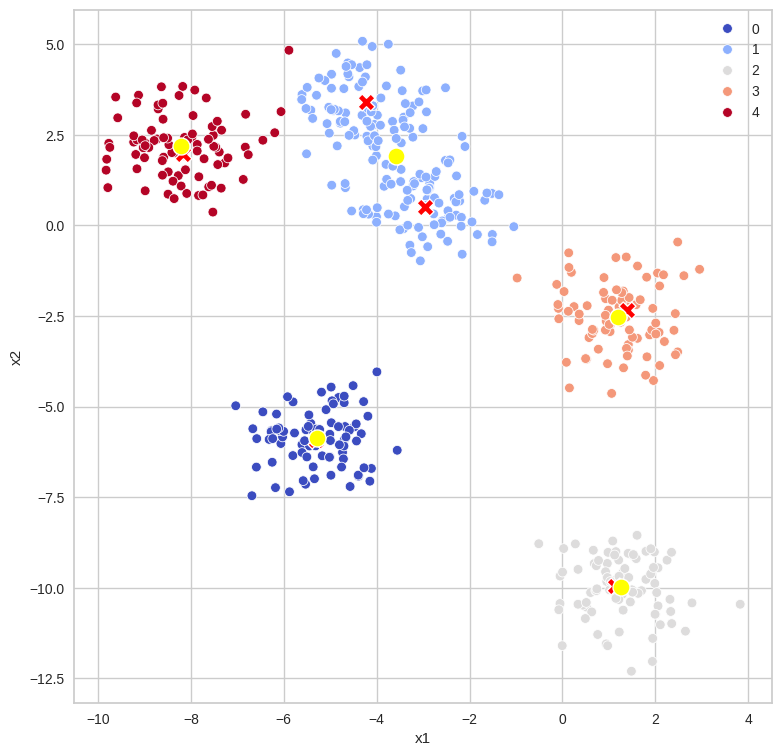

In [55]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()


In [56]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )    
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


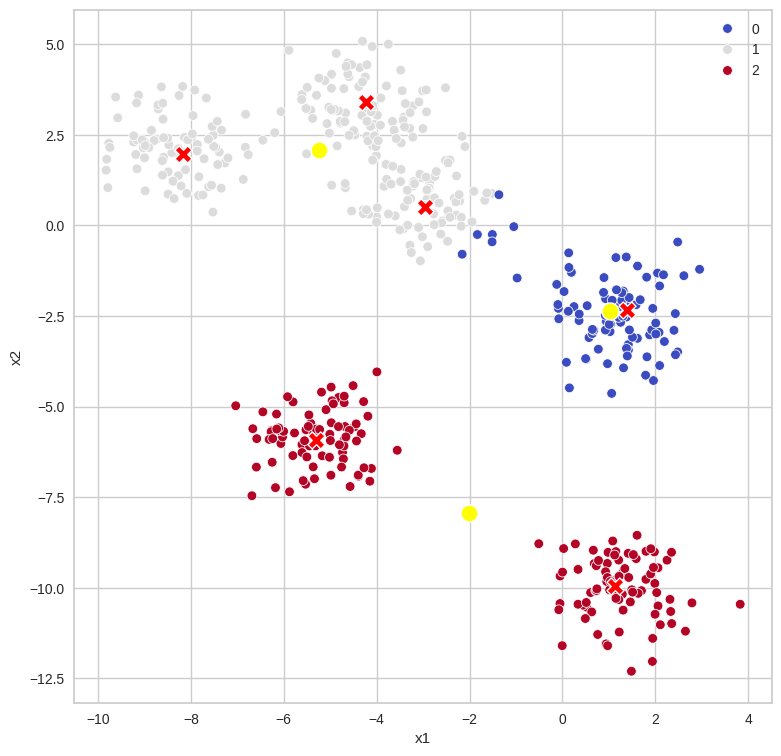

4


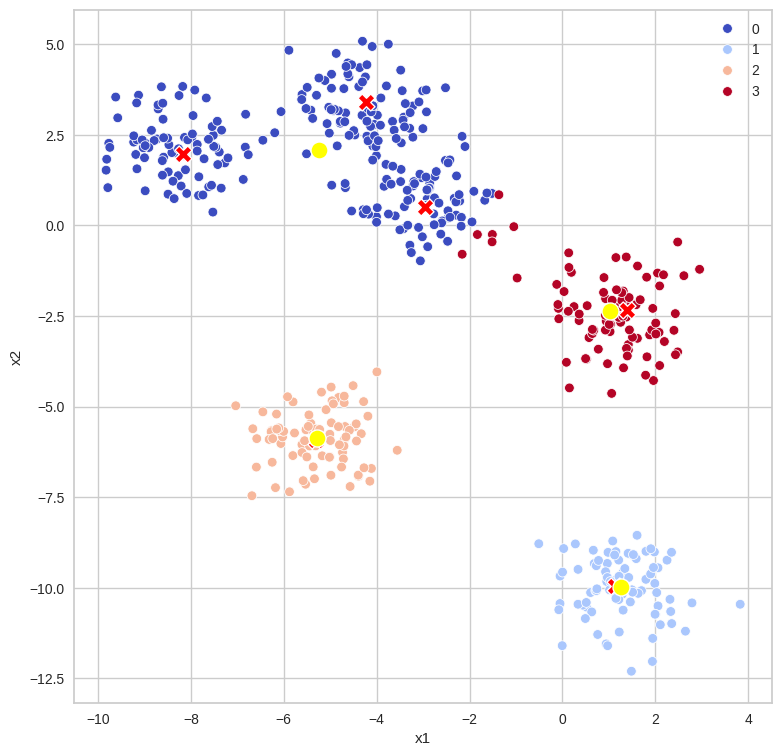

5


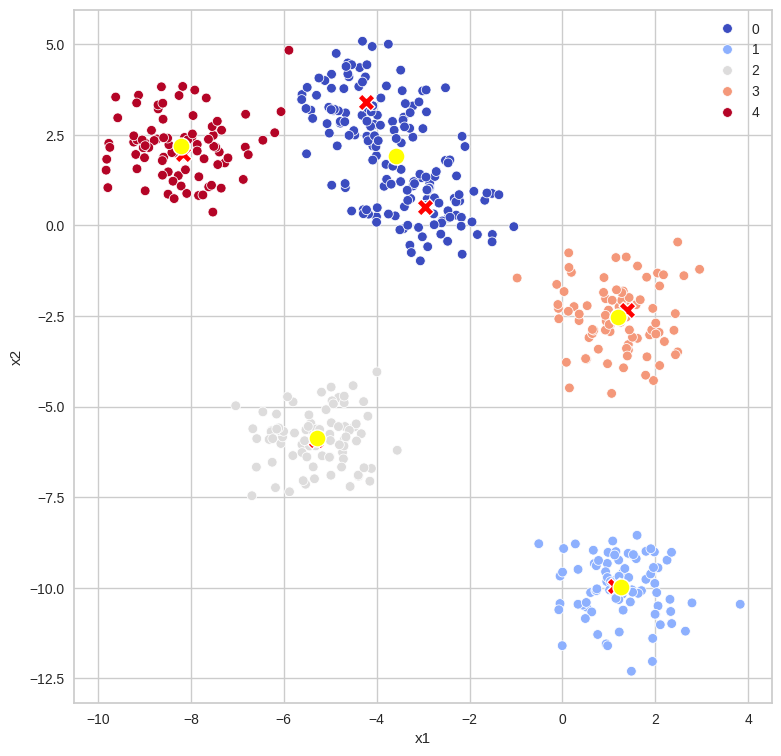

6


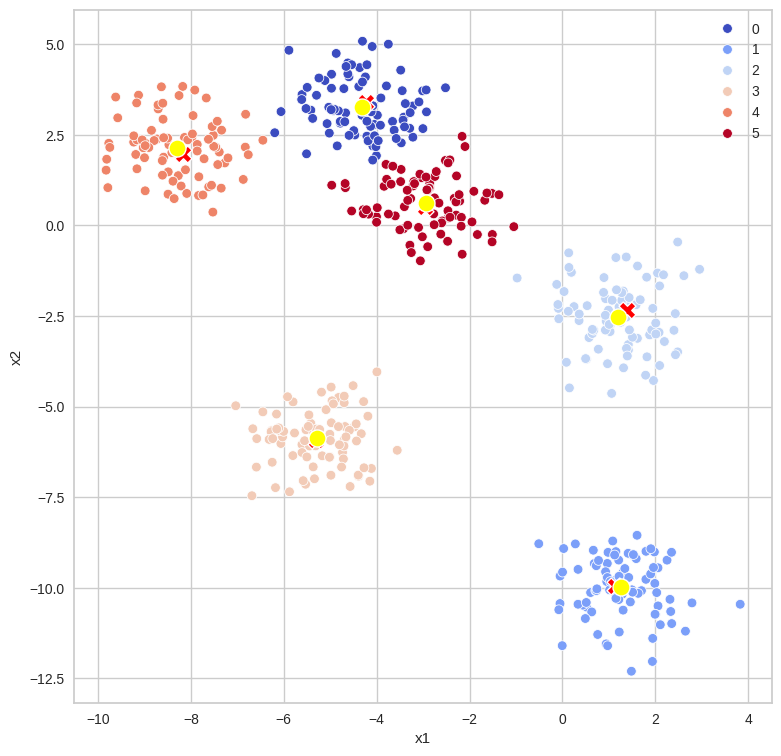

In [57]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K

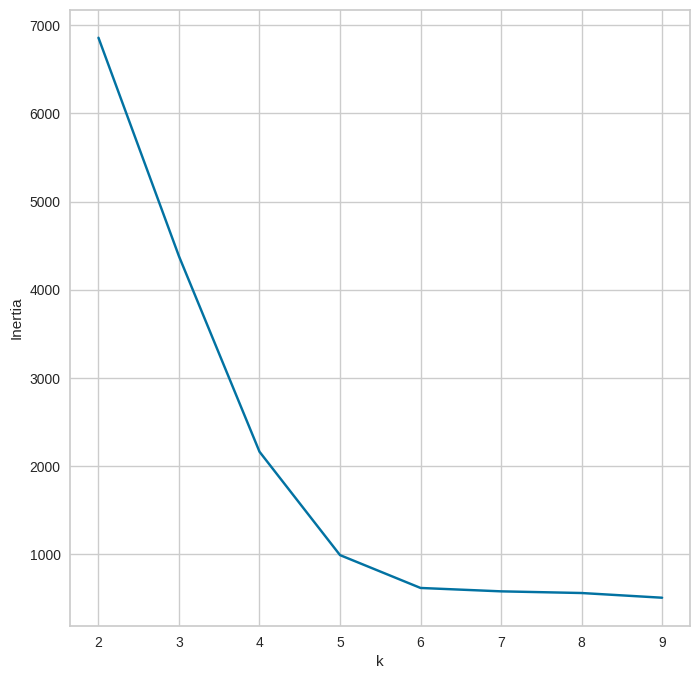

In [58]:
sum_of_squared_distances = []
K = range(2,10)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

#Grafica el calculo para escoger el valor de k
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


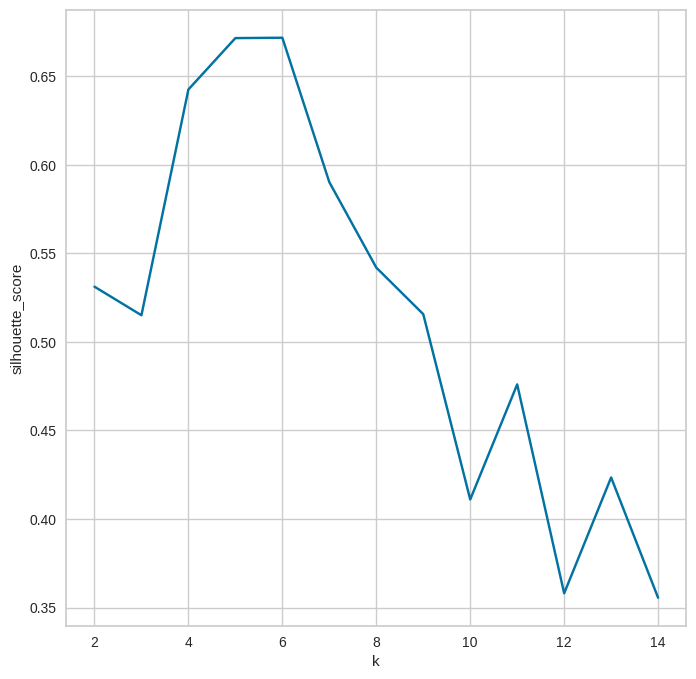

In [59]:
silhouette_scores = []
K = range(2,15)
for k in K: 
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

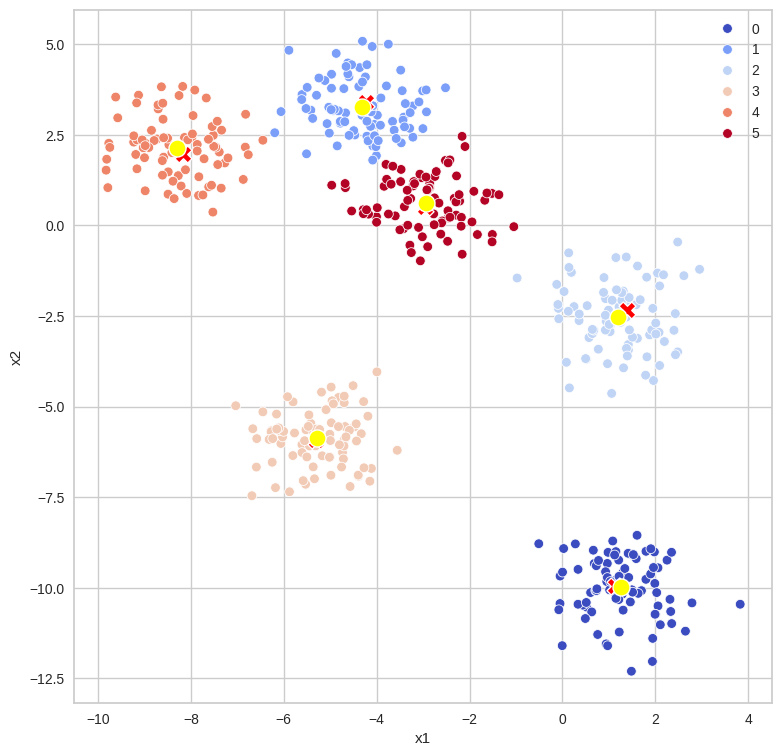

In [63]:
vis_cluster(6)

,estimator,KMeans(n_clusters=6)
,ax,<Axes: >
,colors,'yellowbrick'
,is_fitted,'auto'
,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None


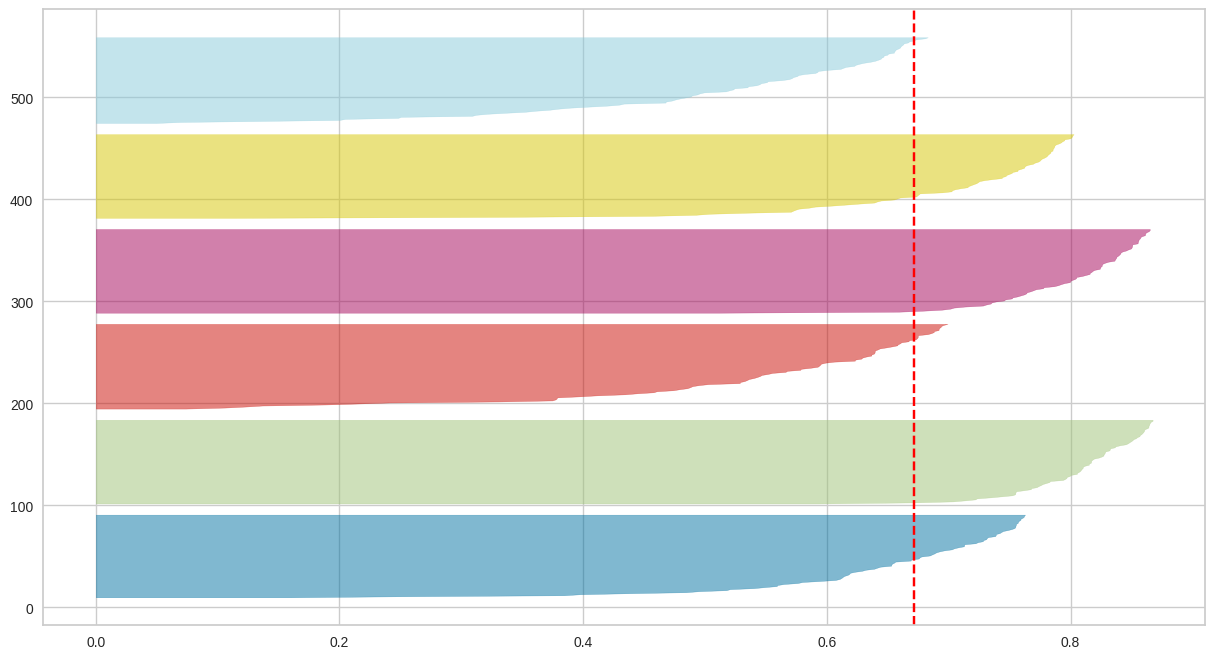

In [65]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=6) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)